In [1]:
# loading libraries
import psycopg2
import pandas as pd
import numpy as np
import pandas.io.sql as psql
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# connecting to redshift 
dbname1, host1, port1, user1, password1 = pd.read_csv("../../credentials.csv")
con = psycopg2.connect(dbname= dbname1, host= host1, port= port1, user= user1, password= password1)

In [3]:
# get a cursor from DB connection
cur = con.cursor()

## Retention

**Definition**: If a user1 used the product on day1, and used the product again on day2, he/she is a **retained user**. If user2 used the product on day1, but not on day2, he/she is a **lapsed user**. Retention for day1 is the number of retained users divided by the number of total users. If user1 and user2 were the only two users on day1, then retention for day1 is 50%.

In [4]:
# min and max data from 2013 to 2017
data = psql.read_sql('select bitagnumber, min(min_date), max(max_date) from ((select bitagnumber, min(dttransdatetime) as min_date, max(dttransdatetime) as max_date from "public"."fastrak_2013" where bitagnumber != 0 group by bitagnumber) union (select bitagnumber, min(dttransdatetime) as min_date, max(dttransdatetime) as max_date from "public"."fastrak_2014" where bitagnumber != 0 group by bitagnumber) union (select bitagnumber, min(dttransdatetime) as min_date, max(dttransdatetime) as max_date from "public"."fastrak_2015" where bitagnumber != 0 group by bitagnumber) union (select bitagnumber, min(dttransdatetime) as min_date, max(dttransdatetime) as max_date from "public"."fastrak_2016" where bitagnumber != 0 group by bitagnumber) union (select bitagnumber, min(dttransdatetime) as min_date, max(dttransdatetime) as max_date from "public"."fastrak_2017" where bitagnumber != 0 group by bitagnumber)) as tb1 group by bitagnumber;', con)

In [5]:
data['num days'] = (data['max'] - data['min']).dt.days

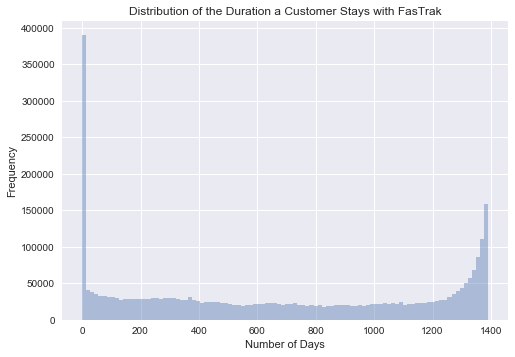

In [6]:
ax = sns.distplot(data['num days'], bins=100, kde=False)
ax.set_title('Distribution of the Duration a Customer Stays with FasTrak')
ax.set_xlabel('Number of Days')
ax.set_ylabel('Frequency')
sns.plt.show()

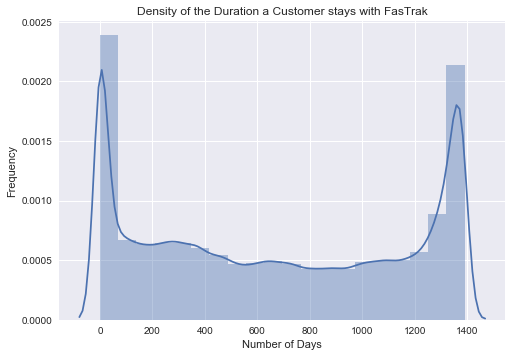

In [7]:
ax = sns.distplot(data['num days'], bins=20)
ax.set_title('Density of the Duration a Customer stays with FasTrak')
ax.set_xlabel('Number of Days')
ax.set_ylabel('Frequency')
sns.plt.show()

### How long after their first time they used FasTrak Again?

### Import 2013

In [4]:
# execute query and load into pandas df
data1 = psql.read_sql('select dttransdatetime, bitagnumber, lag(dttransdatetime) over (partition by bitagnumber order by dttransdatetime desc) from "public"."fastrak_2013" where bitagnumber != 0;', con)

In [22]:
data1 = data1.sort_values(['bitagnumber', 'dttransdatetime'])
data1['days in between'] = (data1['lag'] - data1['dttransdatetime']).dt.days
data1 = data1.groupby("bitagnumber", as_index=False).first()
data1['days in between'] = data1['days in between'].fillna(-1)

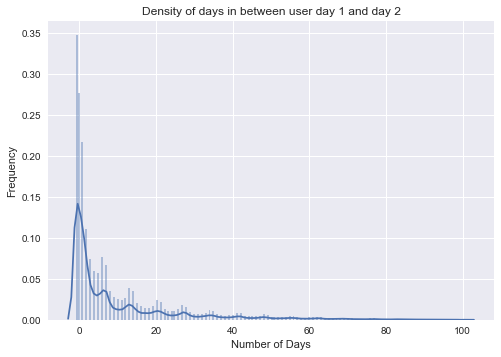

In [14]:
ax = sns.distplot(data1['days in between'], bins=200)
ax.set_title('Density of days in between user day 1 and day 2')
ax.set_xlabel('Number of Days')
ax.set_ylabel('Frequency')
sns.plt.show()

### Import 2014

In [19]:
# execute query and load into pandas df
data2014 = psql.read_sql('select dttransdatetime, bitagnumber, lag(dttransdatetime) over (partition by bitagnumber order by dttransdatetime desc) from "public"."fastrak_2014" where bitagnumber != 0;', con)
data2014 = data2014.sort_values(['bitagnumber', 'dttransdatetime'])
data2014['days in between'] = (data2014['lag'] - data2014['dttransdatetime']).dt.days
data2014 = data2014.groupby("bitagnumber", as_index=False).first()
data2014['days in between'] = data2014['days in between'].fillna(-1)

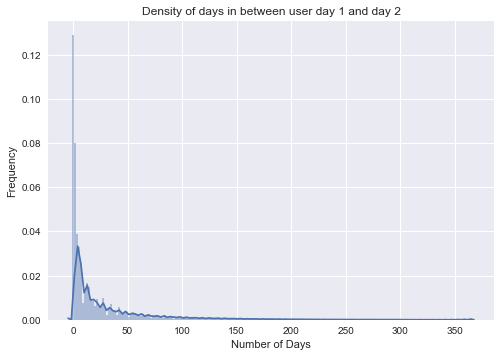

In [20]:
ax = sns.distplot(data2014['days in between'], bins=200)
ax.set_title('Density of days in between user day 1 and day 2')
ax.set_xlabel('Number of Days')
ax.set_ylabel('Frequency')
sns.plt.show()

In [ ]:
data1[data1['days in between']==-1]